# Checkpoint 1

Importowanie bibliotek.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

Wczytywanie danych.

In [81]:
gb_videos = pd.read_csv("data/GB_videos_5p.csv", sep=';')
gb_category = pd.read_json("data/GB_category_id.json")
us_videos = pd.read_csv("data/US_videos_5p.csv", sep=';')
us_category = pd.read_json("data/US_category_id.json")

Wstępne przetwarzanie danych

In [82]:
def change_date_format(df):
    data = df["trending_date"]
    data = data.split('.')
    data = list(map(int, data))
    if data[0] < 2000:
        data[0] += 2000
    return date(data[0], data[2], data[1])

gb_videos["trending_date"] = gb_videos.apply(lambda row: change_date_format(row), axis=1)
us_videos["trending_date"] = us_videos.apply(lambda row: change_date_format(row), axis=1)

## Wstępne statystyki

### Filmy z UK

<AxesSubplot:xlabel='trending_date'>

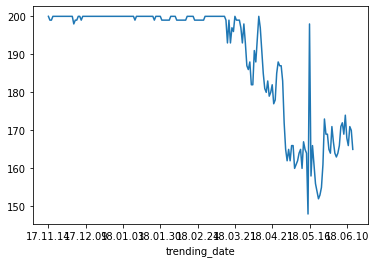

In [35]:
trending = gb_videos.groupby("trending_date")["trending_date"].count()
trending.plot()

<AxesSubplot:ylabel='Frequency'>

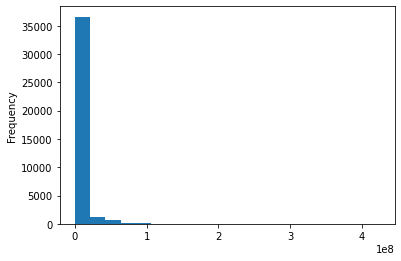

In [4]:
gb_videos["views"].plot.hist(bins=20)

(array([3.8788e+04, 7.1000e+01, 2.6000e+01, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.3000e+01, 8.0000e+00]),
 array([      0. ,  194497.1,  388994.2,  583491.3,  777988.4,  972485.5,
        1166982.6, 1361479.7, 1555976.8, 1750473.9, 1944971. ]),
 <BarContainer object of 10 artists>)

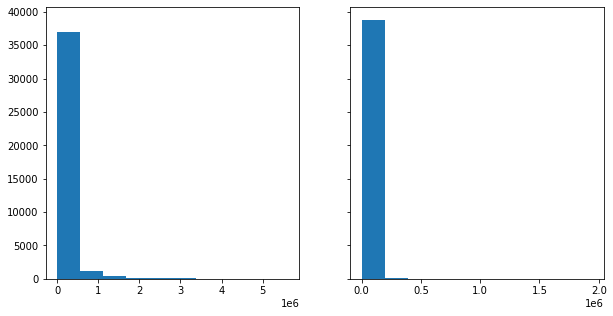

In [5]:
fig, ax = plt.subplots(1, 2, sharey="row", figsize=(10,5))

ax[0].hist(x=gb_videos["likes"], bins=10)
ax[1].hist(x=gb_videos["dislikes"], bins=10)

<AxesSubplot:ylabel='Frequency'>

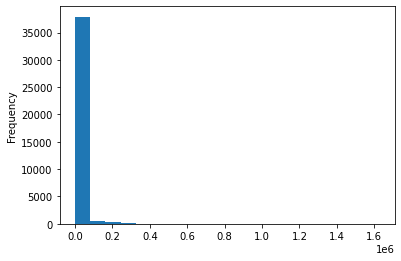

In [6]:
gb_videos["comment_count"].plot.hist(bins=20)

<AxesSubplot:>

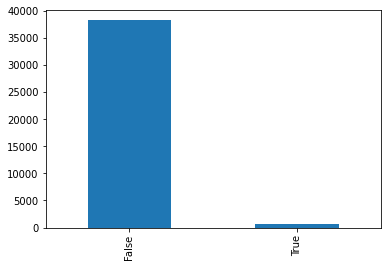

In [7]:
gb_videos["comments_disabled"].value_counts().plot.bar()

<AxesSubplot:>

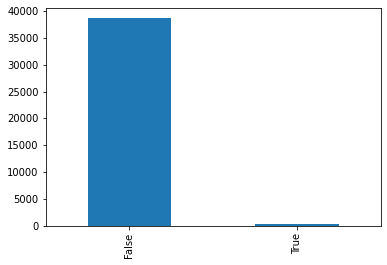

In [8]:
gb_videos["ratings_disabled"].value_counts().plot.bar()

<AxesSubplot:>

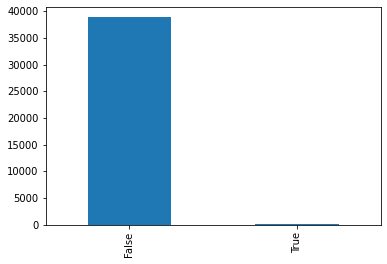

In [9]:
gb_videos["video_error_or_removed"].value_counts().plot.bar()

### Filmy z USA

<AxesSubplot:ylabel='Frequency'>

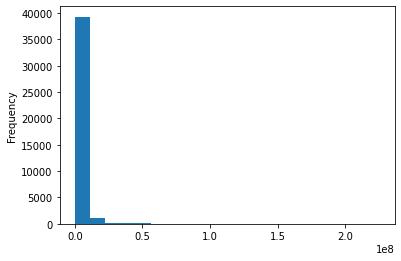

In [10]:
us_videos["views"].plot.hist(bins=20)

(array([4.0866e+04, 5.9000e+01, 1.0000e+01, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00]),
 array([      0.,  167442.,  334884.,  502326.,  669768.,  837210.,
        1004652., 1172094., 1339536., 1506978., 1674420.]),
 <BarContainer object of 10 artists>)

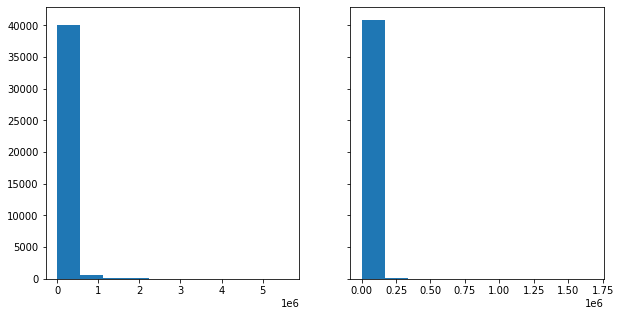

In [11]:
fig, ax = plt.subplots(1, 2, sharey="row", figsize=(10,5))

ax[0].hist(x=us_videos["likes"], bins=10)
ax[1].hist(x=us_videos["dislikes"], bins=10)

<AxesSubplot:ylabel='Frequency'>

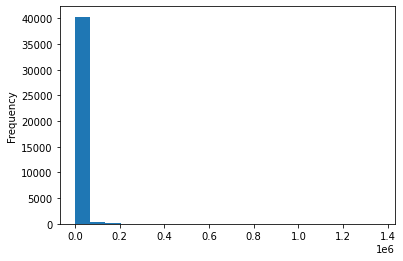

In [12]:
us_videos["comment_count"].plot.hist(bins=20)

<AxesSubplot:>

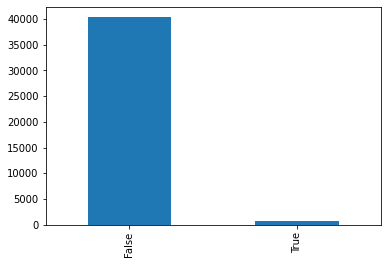

In [13]:
us_videos["comments_disabled"].value_counts().plot.bar()

<AxesSubplot:>

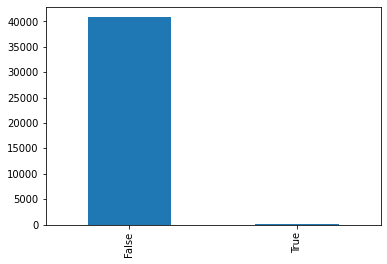

In [14]:
us_videos["ratings_disabled"].value_counts().plot.bar()

<AxesSubplot:>

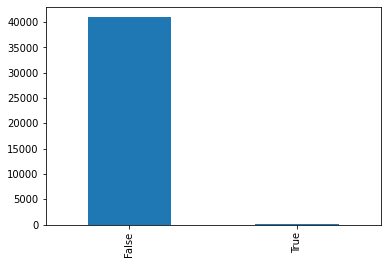

In [15]:
us_videos["video_error_or_removed"].value_counts().plot.bar()